In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import  mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LinearRegression
import xgboost as xgb
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce

In [2]:
import  math

In [4]:
df = pd.read_csv("diamonds.csv")

In [5]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    50000 non-null  float64
 1   cut      50000 non-null  object 
 2   color    50000 non-null  object 
 3   clarity  50000 non-null  object 
 4   depth    50000 non-null  float64
 5   table    50000 non-null  float64
 6   price    50000 non-null  int64  
 7   x        50000 non-null  float64
 8   y        50000 non-null  float64
 9   z        50000 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.8+ MB


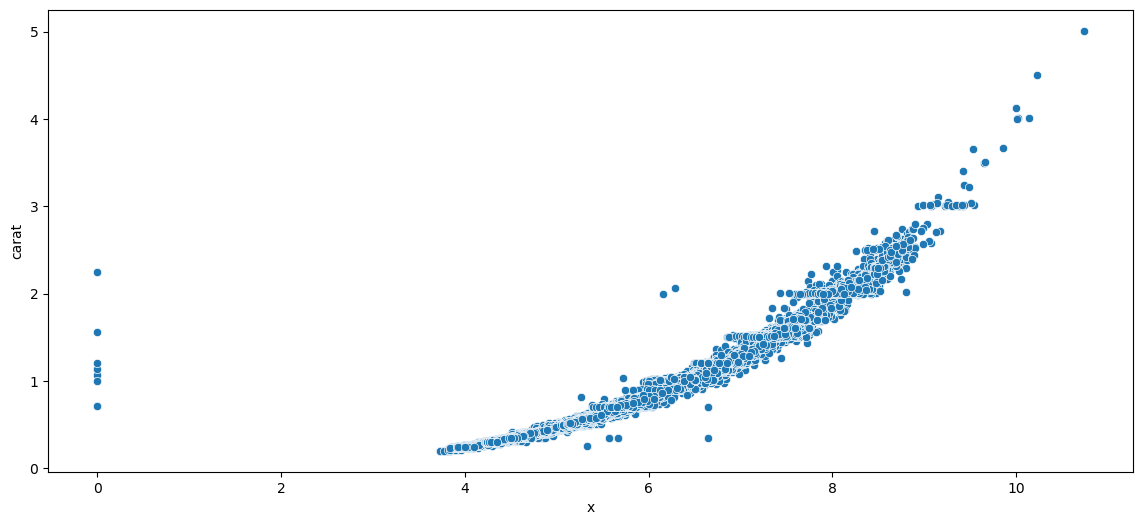

In [7]:
plt.figure(figsize=(14,6))
_=sns.scatterplot(data=df,x="x",  y="carat")


#parece haver uma relação exponencial entre o comprimento do diamante e seu peso em carat

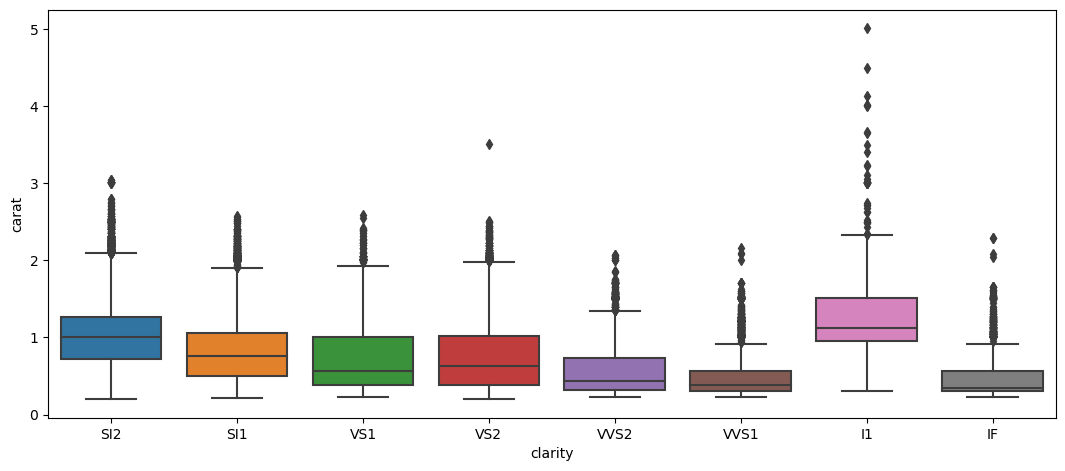

In [8]:
plt.figure(figsize=(13,5.3))
_=sns.boxplot(data=df,x="clarity", y="carat")
#Diamantes do tipo l1 tendem a ser mais pesados. O boxplot abaixo reforça a hipótese.

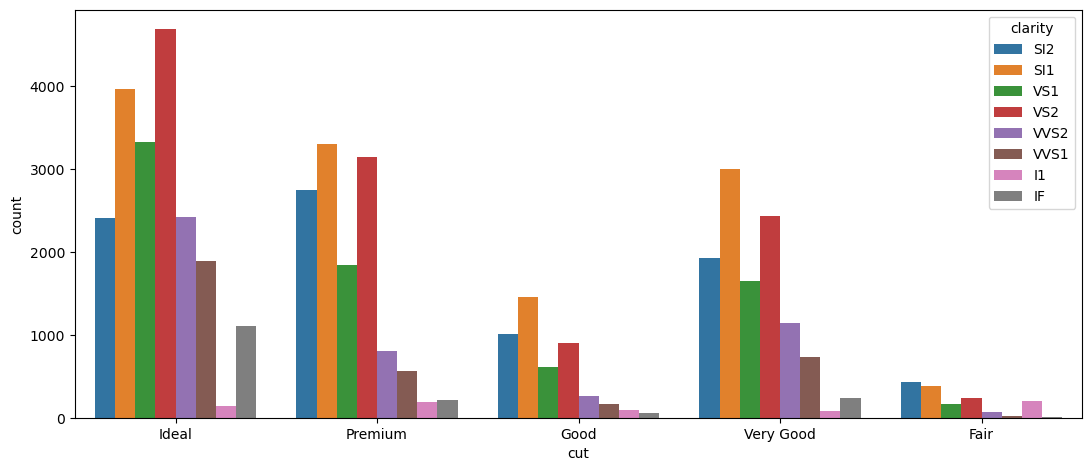

In [9]:
plt.figure(figsize=(13,5.3))

_=sns.countplot(data=df, x="cut",hue="clarity")

In [10]:
pd.crosstab(df["clarity"],df["cut"])

cut,Fair,Good,Ideal,Premium,Very Good
clarity,,,,,
I1,197,91,137,185,78
IF,9,62,1101,217,243
SI1,380,1462,3970,3304,2999
SI2,430,1004,2413,2745,1927
VS1,160,606,3323,1840,1650
VS2,239,901,4688,3139,2437
VVS1,16,164,1887,569,733
VVS2,64,267,2419,807,1137


In [11]:
df.head(3)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31


In [12]:
del df["color"]

In [13]:
X = df[["carat","cut","clarity","depth","table","x","y","z"]]
y=  df["price"]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.25)

In [15]:
cat_feat = ["cut","clarity"]

In [16]:
encoder = ce.OneHotEncoder(cols=cat_feat)

In [17]:
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [18]:
X_train.head()

,carat,cut_1,cut_2,cut_3,cut_4,cut_5,clarity_1,clarity_2,clarity_3,clarity_4,clarity_5,clarity_6,clarity_7,clarity_8,depth,table,x,y,z
27434,0.41,1,0,0,0,0,1,0,0,0,0,0,0,0,62.8,57.0,4.71,4.75,2.97
13400,1.01,0,1,0,0,0,0,1,0,0,0,0,0,0,61.9,59.0,6.38,6.34,3.94
883,0.86,0,0,1,0,0,0,0,1,0,0,0,0,0,61.8,55.0,6.12,6.14,3.79
7303,1.08,1,0,0,0,0,0,0,1,0,0,0,0,0,63.2,57.0,6.54,6.50,4.12
45124,0.77,0,1,0,0,0,1,0,0,0,0,0,0,0,61.8,59.0,5.86,5.82,3.61


In [19]:
scaler = StandardScaler()

In [20]:
X_train = scaler.fit_transform(X_train)

In [21]:
X_test = scaler.transform(X_test)

In [22]:
models = []

models.append(("xgb",xgb.XGBRegressor()))
models.append(("reg",LinearRegression()))

In [23]:
print(models)

[('xgb', XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)), ('reg', LinearRegression())]


In [24]:
results = dict()

for  name, model in models:
    sk = StratifiedKFold(n_splits = 5, random_state=None)
    cv_results = cross_val_score(model,X_train,y_train,cv=sk, scoring="neg_mean_squared_error")
    results[name]= np.sqrt(-cv_results.mean()), np.sqrt(cv_results.std())


print("name     results.mean     results.std")

for key,value in results.items():
    print(key,value)
    
    

G:\Anaconda\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
G:\Anaconda\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


name     results.mean     results.std
xgb (1000.5425742291304, 151.10072220082932)
reg (1284.1509899724176, 238.6874495633062)


In [25]:
xgbl  = xgb.XGBRegressor()

In [26]:
xgbl.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [27]:
y_pred = xgbl.predict(X_test)

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

In [30]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rsme = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rsme:.2f}")
print(f"MAPE: {mape:.2f}")



MAE: 512.91
MSE: 911637.11
RMSE: 954.80
MAPE: 0.13


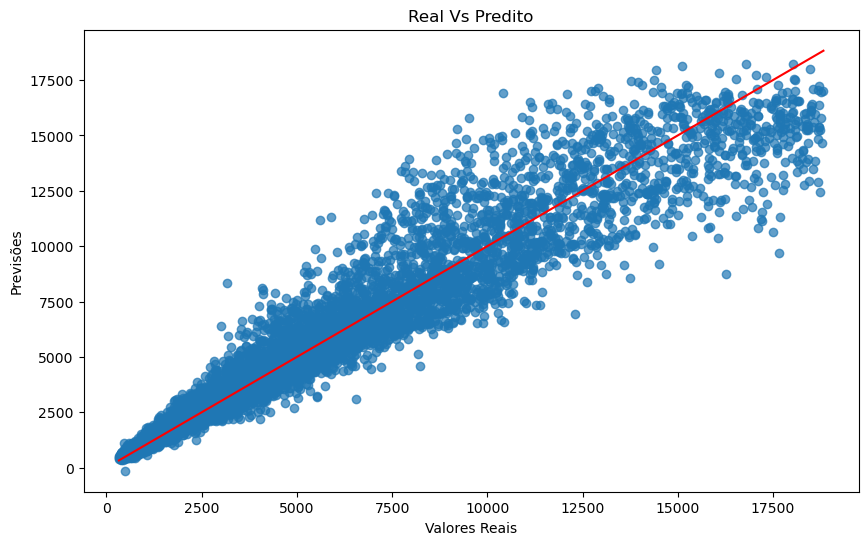

In [34]:
_= plt.figure(figsize=(10,6))
_= plt.scatter(y_test, y_pred, alpha=0.7)
_= plt.plot([min(y_test), max(y_test)]  , [min(y_test), max(y_test)], color="red")
_= plt.xlabel("Valores Reais")
_= plt.ylabel("Previsões")
_= plt.title("Real Vs Predito")
_=plt.show()